#Resolvendo o problema AND, OR e XOR utilizando o Perceptron

##Etapa 01
Importar a biblioteca de computação científica e definir a semente para o random.

In [89]:
import numpy as np
from random import choice

#np.random.seed(1)

##Etapa 02
Definindo a base de dados para AND, OR e XOR.




In [90]:
training_data_and = [ (np.array([1,0,0]), 0), (np.array([1,0,1]), 0),
                      (np.array([1,1,0]), 0), (np.array([1,1,1]), 1)]

training_data_or = [ (np.array([1,0,0]), 0), (np.array([1,0,1]), 1),
                      (np.array([1,1,0]), 1), (np.array([1,1,1]), 1)]

training_data_xor = [ (np.array([1,0,0]), 0), (np.array([1,0,1]), 1),
                      (np.array([1,1,0]), 1), (np.array([1,1,1]), 0)]

In [91]:
print(training_data_and)

[(array([1, 0, 0]), 0), (array([1, 0, 1]), 0), (array([1, 1, 0]), 0), (array([1, 1, 1]), 1)]


##Etapa 03
Conhecer a dimensão dos conjuntos da base de dados.

In [92]:
#print('Comprimento da base training_data_and:', len(training_data_and))
#print('Comprimento da base training_data_or:', len(training_data_or))
print('Comprimento da base training_data_xor:', len(training_data_xor))

Comprimento da base training_data_and: 4


##Etapa 04
Construir a Perceptron e treinar para as portas AND, OR ou XOR.

Observação: alterar os conjuntos de treinamento para AND, OR ou XOR, nas linhas indicadas.

In [93]:
#Inicialização dos pesos
# Fixando o valor dos pesos
#W = [1,1,1]
# Definindo os pesos aleatóriamente
W = np.random.rand(3)
print ('Vetor de peso inicial: ', W)

#Definição dos hiperparâmetros
learning_rate = 0.5
training_steps = 10000 ##numero de épocas

#Criação de função lambda para ativação
activation = lambda x: 0 if x < 0 else 1

Vetor de peso inicial:  [0.56025849 0.94441244 0.67627999]


In [94]:
#Treinamento
for i in range(training_steps):
  x, y = choice(training_data_xor)  #<=== Mude aqui o conjunto de treinamento.
  #print('amostra', x)
  u = np.dot(W, x)
  y_pred = activation(u)
  #print('Iteraçao:', i, '\nl1 e y_pred', l1, y_pred)
  error = y - y_pred
  #print('erro:', error)
  update = learning_rate * error * x
  W += update

In [95]:
# Saída apos o treinamento
print("\nValores encontrados após o treino:")

for x, _ in training_data_xor: #<=== Mude aqui o conjunto de treinamento.
  y_pred = np.dot(x, W)
  print("{}: {}".format(x[:3], activation(y_pred)))

print('\nVetor de peso final: ', W)


Valores encontrados após o treino:
[1 0 0]: 0
[1 0 1]: 0
[1 1 0]: 0
[1 1 1]: 0

Vetor de peso final:  [-0.43974151 -0.55558756  0.17627999]


# Etapa 05
Visualizando a resposta do problema AND, OR ou XOR.

Observação: alterar os conjuntos de treinamento para AND, OR ou XOR, nas linhas indicadas.

Equação da reta:  
0.3173 x - 0.7915


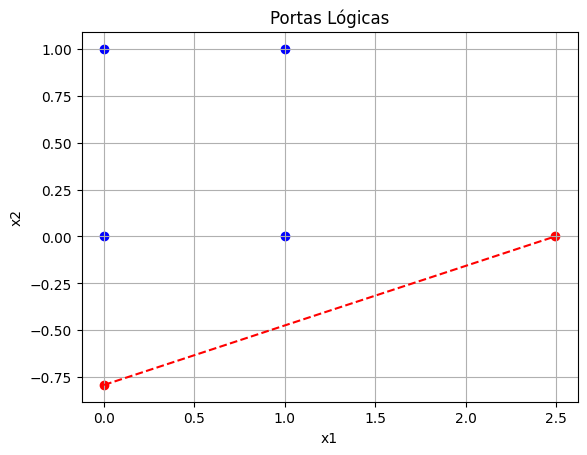

In [96]:
import matplotlib.pyplot as plt

# Equação da reta: w0x0 + w1x1 + w2x2 = 0 -> w1x1 + w2x2 = -w0x0

#  w1x1 + w2x2 = -w0

# Encontrando dois pontos para definir a equacao da reta
# ponto 1: x1 = 0 --> x2 = - w0/w2
# ponto 2: x2 = 0 --> x1 = -w0/w1
x1 = [0, -W[0]/W[2] ]
x2 = [-W[0]/W[1] , 0]

z = np.polyfit(x1, x2, 1)
p = np.poly1d(z)
print('Equação da reta:', p )

e1 = [0, 0, 1, 1]
e2 = [0, 1, 0, 1]
#Plotando a reta
plt.scatter(x1, x2, marker='o', color='r')
plt.scatter(e1, e2, marker='o', color='b')
plt.plot(x1,p(x1),'r--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Portas Lógicas")
plt.grid()
plt.show()